# Multiple Linear Regression

# 1. 먼저 식을 세운다. 이때 수사가 아닌 값은 어떻게 처리해야할까?
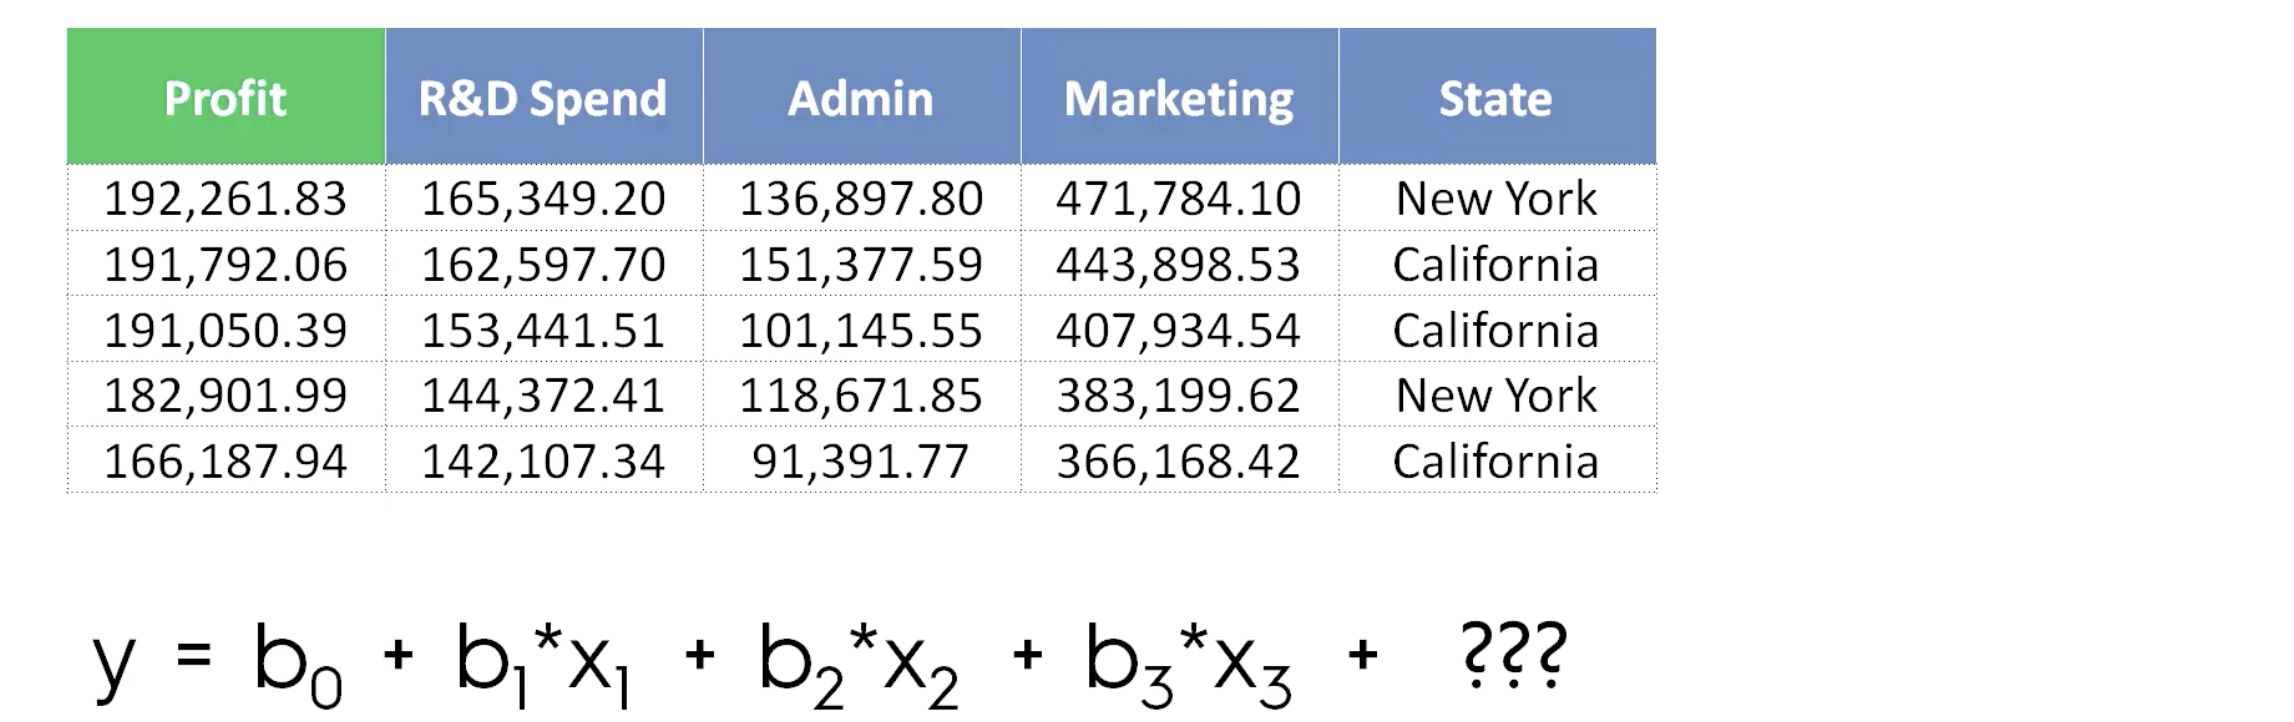

## [목표] 
- 투자한 회사들이 어디에 투자를 하고, 어디에 위치했는지에 따른 수익 예측 모델 만들기
- 신규 투자를 할 때, 의사결정 참고자료로 사용함

### lib와 데이터 로딩

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data_ml/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.describe(include='object')

,State
count,50
unique,3
top,New York
freq,17


In [8]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

## 데이터 전처리

In [9]:
y = df['Profit']

In [10]:
X = df.loc[:, 'R&D Spend':'State']
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
# remainder='passthrough' 나머지는 통과시켜라는 뜻
ct = ColumnTransformer([('encorder',OneHotEncoder(),[3])],remainder='passthrough')

In [52]:
ct.fit_transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 197 stored elements and shape (50, 54)>

In [13]:
X = ct.fit_transform(X)

In [14]:
type(X)

numpy.ndarray

In [15]:
ct.fit_transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 197 stored elements and shape (50, 54)>

In [16]:
X[:5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

# 학습용 테스트용 나눔

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 학습 8:테스트 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [19]:
X_train.shape, y_train.shape

((40, 6), (40,))

In [20]:
X_test.shape, y_test.shape

((10, 6), (10,))

## 모델 학습

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# 객체 생성
lr_model = LinearRegression()

In [23]:
# 데이터 학습
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# 회귀선의 기울기
lr_model.coef_

array([-4.31767824e+02, -1.55681873e+03,  1.98858655e+03,  8.08286664e-01,
       -2.61729246e-02,  3.07501226e-02])

In [25]:
# 회귀선의 편차
lr_model.intercept_

np.float64(48803.932588414704)

## 모델 성능 평가

In [26]:
# 테스트
y_pred = lr_model.predict(X_test)

In [27]:
# MSE
((y_test - y_pred)**2).mean()

np.float64(100911162.80590256)

In [28]:
# 오차 결과 : RMSE
np.sqrt(((y_test - y_pred)**2).mean())

np.float64(10045.454833202057)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [30]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2_sep = r2_score(y_test, y_pred)

In [31]:
import numpy as np
print(f"rsme = {np.square(MSE)}\n mae= {MAE}\n re_s={r2_sep}")

rsme = 1.0183062778839372e+16
 mae= 7917.874510656649
 re_s=0.8998123419674642


### 실제값과 예측값 시각화

In [32]:
df_test = y_test.to_frame()

In [33]:
df_test

,Profit
13,134307.35
15,129917.04
22,110352.25
42,71498.49
30,99937.59
27,105008.31
1,191792.06
20,118474.03
10,146121.95
36,90708.19


In [34]:
df_test['y_pred'] = y_pred
df_test

,Profit,y_pred
13,134307.35,126951.562112
15,129917.04,148200.835666
22,110352.25,113169.450696
42,71498.49,69514.301556
30,99937.59,97132.051584
27,105008.31,116589.986827
1,191792.06,189485.657238
20,118474.03,116210.871695
10,146121.95,133774.253314
36,90708.19,73274.890585


In [35]:
# 인덱스 리셋
df_test = df_test.reset_index(drop=True)

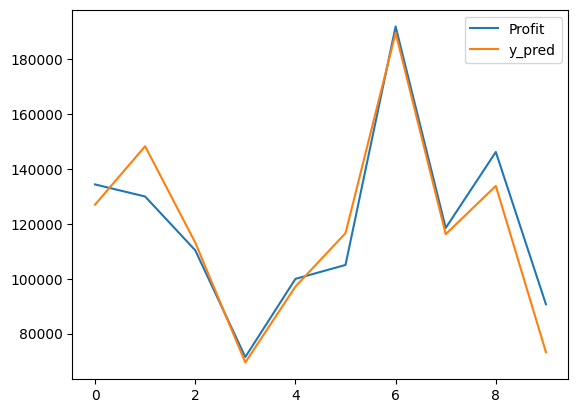

In [36]:
# 실제값과 예측 오차 시각화
df_test.plot()
plt.show()

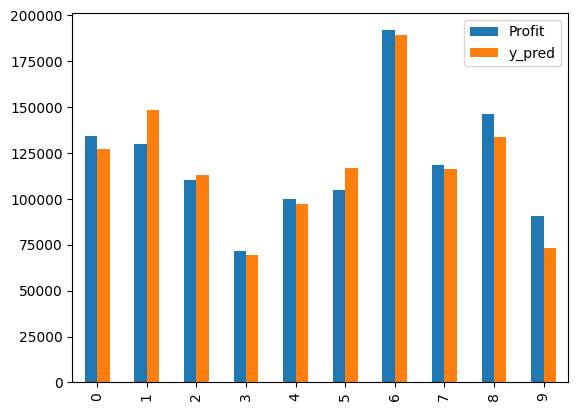

In [37]:
# 실제값과 예측 오차 시각화
df_test.plot(kind='bar')
plt.show()

## 일반화 테스트
- 실제 값을 넣어보기

In [46]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [47]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [48]:
X[:3]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05]])

In [38]:
# 저희회사는
# 운영비 15만달라, 마테팅비 40만달라, 연구개발비는 13만달러 쓰고 있습니다. 회사 위치는 플로리다에 있습니다.

In [ ]:
# [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05],
# 꼭 2차원 리스트여야함
# 'state', R&D Spend	'Administration' 	'Marketing Spend'
real_data = [[0, 1, 0 , 150000, 400000, 130000]]
# R&D Spend	Administration	Marketing Spend	State
X_real = np.array(real_data)

In [43]:
X_real.shape

(1, 6)

In [44]:
y_real_pred = lr_model.predict(X_real)

In [45]:
y_real_pred

array([162018.45954373])

In [54]:
new_data = np.array([[0, 1, 0 , 130000, 150000, 400000],
                     [0,0,1, 150000, 110000, 600000]])

In [55]:
new_data

array([[     0,      1,      0, 130000, 150000, 400000],
       [     0,      0,      1, 150000, 110000, 600000]])

## 모델 저장하기
- 예측을 잘 하면 서비스화를 위해 모델 저장하기

### 모델 저장하기

In [56]:
import joblib

In [58]:
# 모델 직렬화(모델의 메모리 상태를 그대로 파일로 저장함)
import os
os.makedirs('models', exist_ok=True)
joblib.dump(lr_model, 'models/lr_model.pkl')

['models/lr_model.pkl']

### 저장된 모델 로딩하여 테스트

In [59]:
ai = joblib.load('models/lr_model.pkl')

In [60]:
ai.predict(new_data)

array([160698.49053132, 187606.57059605])